<a href="https://colab.research.google.com/drive/198X5yCesbhuAJIkqKKr3TFkT-tfNO-VN" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# การบ้านสัปดาห์ที่ 1
- ความเข้าใจพื้นฐานเรื่องภาพดิจิตอลสำหรับวิชาการประมวลผลภาพ เช่น pixel color, image size, type of image
- การอ่านไฟล์ภาพ (read image file) มาเป็นข้อมูลดิจิตอล 

## แบบฝึกหัดที่ 1.1

**วัตถุประสงค์**
- เพื่อเป็นการทำความเข้าใจว่าภาพดิจิตอลก็คือข้อมูล array ของตัวเลขที่ถูกนำมาแสดงผลผ่านหน้าจอเท่านั้น


**โจทย์:** 

- รันโปรแกรมต่อไปนี้แล้วสังเกตผล
- แก้ไขหรือเพิ่มเติมโค๊ดเพื่อให้ได้ผลลัพธ์ดังภาพที่กำหนด 


<img align="left" width="100" height="100" src="https://github.com/jbinteam/010723305/blob/main/images/week1_output_sample.png?raw=true">

In [2]:
import numpy as np #เรียกใช้งาน library numpy โดยหลังจากนี้จะเรียกใช้ด้วยการพิมพ์สั้นๆแค่ np
from PIL import Image #เรียกใช้งาน Image จาก library PIL
from matplotlib import pyplot as plt #เรียกใช้งาน pyplot จาก matplotlib โดยหลังจากนี้จะเรียกใช้ด้วยการพิมพ์สั้นๆแค่ plt

from skimage import io as ski_io
import cv2
import numpy as np
from skimage.util import img_as_ubyte


data size: 30000
image size: (100, 100)


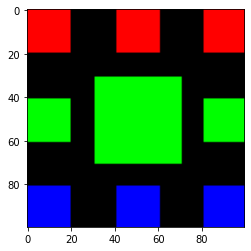

In [ ]:
width, height = 100, 100 #กำหนดขนาดของข้อมูล
data = np.zeros((height, width, 3), dtype=np.uint8) #สร้างตัวแปรที่ชื่อว่า data เพื่อเก็บค่าของตัวเลข

print("data size:",data.size)

######## แก้ไข หรือ เพิ่มเติมโปรแกรมลงในโค๊ดด้านล่าง #######


#RED----------------------------------------------------------------------------
data[0:20, 0:20]   = [255, 0, 0]
data[0:20, 41:61]  = [255, 0, 0]
data[0:20, 81:100] = [255, 0, 0]
#GREEN--------------------------------------------------------------------------
data[41:61, 0:20]   = [0, 255, 0]
data[31:71, 31:71]  = [0, 255, 0]
data[41:61, 81:100] = [0, 255, 0]
#BLUE---------------------------------------------------------------------------
data[81:100, 0:20]   = [0, 0, 255]
data[81:100, 41:61]  = [0, 0, 255]
data[81:100, 81:100] = [0, 0, 255]
#-------------------------------------------------------------------------------


####################################################

img = Image.fromarray(data, 'RGB') #แปลงข้อมูลตัวเลขเป็นข้อมูลภาพประเภท RGB
print("image size:",img.size)

plt.imshow(img)
plt.show()

## แบบฝึกหัดที่ 1.2

**วัตถุประสงค์**
- เพื่อเป็นการทำความเข้าใจว่าภาพดิจิตอลก็คือข้อมูล array ของตัวเลขที่ถูกนำมาแสดงผลผ่านหน้าจอเท่านั้น (ต่อ)

**โจทย์:** 

ให้นักศึกษาสังเกตผลลัพธ์จากการ run โค๊ดด้านล่างที่เป็นการนำข้อมูล array มาต่อกันก่อนที่จะแสดงผลแล้วตอบคำถามต่อไปนี้
- ตรวจสอบขนาดของภาพหลังจากการใช้คำสั่ง *np.hstack((a,b))* 
- ลองเปลี่ยนคำสั่ง *np.hstack((a,b))* เป็น *np.vstack((a,b))* ตรวจสอบขนาดภาพอีกครั้ง

stack images: (100, 200)


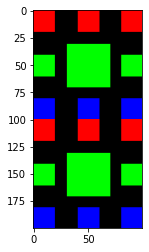

In [ ]:
#stack_data=np.hstack((data,data))
stack_data=np.vstack((data,data))

images = Image.fromarray(stack_data, 'RGB')

print("stack images:",images.size)

plt.imshow(images)
plt.show()

## แบบฝึกหัดที่ 1.3

**วัตถุประสงค์**
- เรียนรู้การ load ภาพตระกูล .jpg หรือ .png เข้ามาเป็นข้อมูลก่อนนำไปใช้ในการประมวลผล

**คำถาม:** 
- การ load ภาพด้วย library จาก opencv และ load ภาพด้วย library จาก Pillow  ต่างกันหรือไม่ อย่างไรจงอธิบาย

(50, 20, 72)


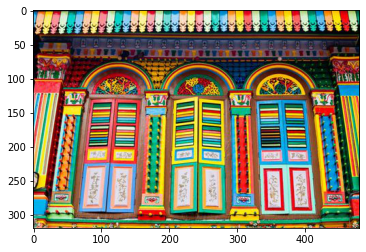

In [ ]:
import urllib.request,io
path = io.BytesIO(urllib.request.urlopen(url).read())

pil_img=Image.open(path) #load ข้อมูลภาพด้วย pillow

#load ข้อมูล intensity สีของแต่ละ pixel
px = pil_img.load()

#แสดงค่า color intensity ตำแหน่ง [0,0] channel 0,1,2 
print(px[0,0])

plt.imshow(pil_img)
plt.show()

# pillow เป็นการโหลดรูปภาพโดยไม่ต้องนำข้อมูลมาแปลงก่อน

(320, 480, 3)
50 20 72


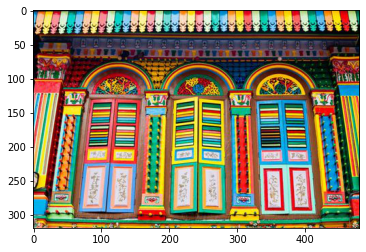

In [3]:
import urllib
url="https://github.com/jbinteam/010723305/blob/main/images/singapore-little-india.jpg?raw=true"

image = ski_io.imread(url)
url_response = urllib.request.urlopen(url)

img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)

#cv_img = cv2.imdecode(img_array, -1) # 'Load it as it is'

cv_img = img_as_ubyte(image) #แปลงข้อมูล unsigned byte เป็น image


print(cv_img.shape) # แสดงค่า shape ของภาพ (size, channel)

print(cv_img[0][0][0],cv_img[0][0][1],cv_img[0][0][2]) # แสดงค่า color intensity ที่ตำแหน่ง (0,0) ของแต่ละ channel

plt.imshow(cv_img)
plt.show()

# opencv มีการแปลงข้อมูล unsigned byte เป็น image ก่อนจะนำภาพไปแสดงผล 

## แบบฝึกหัดที่ 1.4

**วัตถุประสงค์**
- เรียนรู้การ load ภาพเข้ามาเป็นชุดข้อมูลรูปแบบ RGB, BGR, Grayscale

**คำถาม:** 
- เมื่อ uncomment code ในหัวข้อย่อ 1.4.1 ถึง 1.4.4 หัวข้อใดยังสามารถทำงานได้หรือไม่ได้ เพราะอะไร



In [6]:
gray_img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE) #load ข้อมูลเป็น grayscale
color_img = cv2.imdecode(img_array, cv2.IMREAD_COLOR) #load ข้อมูลเป็น color

#แสดงค่า　intensity สีของ pixel ตำแหน่งที่ [1,3] ของทั้ง 3 channel สี

print(gray_img[0][0],gray_img[0][0],gray_img[0][0]) # 1.4.1
# 1.4.1 ไม่สามารถทำงานได้เนื่องจากเป็นภาพแบบ GRAYSCALE ไม่ใช่ภาพ 3 channel
# ทำให้ไม่สามารถแสดงค่า intensity ของทั้ง 3 channel สี

print(gray_img.shape)
print(color_img.shape)

#ทำการ stack data ก่อนนำมาแสดงผล

#images=np.hstack((color_img,color_img)) # 1.4.2
# 1.4.2 ทำงานได้โดยจะแสดงผลเป็นภาพสีแบบ 3 channel เนื่องจาก color_imgเป็นภาพชนิดเดียวกันทำให้สามารถทำงานได้
#โดย np.hstack จะเผ็นการนำภาพมาต่อกันทางแนวนอน

#images=np.hstack((gray_img,gray_img)) # 1.4.3
# 1.4.3 ทำงานได้โดยจะแสดงผลเป็นภาพขาว-ดำ แบบ GRAYSCALE เนื่องจาก gray_img เป็นภาพชนิดเดียวกันทำงห้สามารถทำงานได้
# โดย np.hstack จะเผ็นการนำภาพมาต่อกันทางแนวนอน

#images=np.hstack((color_img,gray_img)) # 1.4.4
# 1.4.4 ไม่สามารถทำงานได้ เพราะ เนื่องจาก color_img เป็นภาพสีแบบ 3 channel แต่  gray_img เป็นภาพขาว-ดำ แบบ GRAYSCALE
# เนื่องจาก channel สีของรูปที่ต่างกันทำให้คำสั่งไม่สามารถใช้งานได้

# images=cv2.cvtColor(images,cv2.COLOR_BGR2RGB) # ลองรันโปรแกรมแบบ　uncomment สลับกับ comment ในบรรทัดนี้ แล้วสังเกตผล

#เลือกวิธีแสดงผลตามประเภทของข้อมูลที่โหลด
#plt.imshow(images) #แสดงผลเป็นสี
#plt.imshow(images,'gray') #แสดงผลเป็น　grayscale
plt.show()

35 35 35
(320, 480)
(320, 480, 3)
